In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import os, sys, cv2
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [36]:
data_augmentation = keras.Sequential([keras.layers.RandomFlip()])

In [37]:
def image_processing(image, labels):
    image = image/255.
    image = data_augmentation(image)
    return image, labels

In [ ]:
train = keras.utils.image_dataset_from_directory('/kaggle/input/weather-dataset/dataset', validation_split=.2, subset='training', seed=0, shuffle=True, image_size=(256,256))
valid = keras.utils.image_dataset_from_directory('/kaggle/input/weather-dataset/dataset', validation_split=.2, subset='validation', seed=0, shuffle=True, image_size=(256,256))

In [22]:
classes = train.class_names

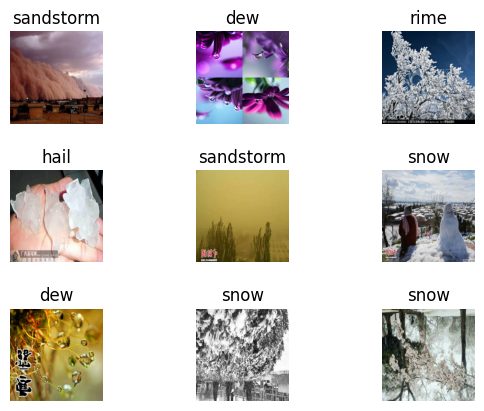

In [52]:
for image, labels in train_.take(1):
    for i in range(1,10):
        plt.subplot(3,3,i)
        plt.imshow(image[i])
        plt.title(classes[labels[i]])
        plt.axis('off')
        plt.subplots_adjust(hspace=.5, wspace=.5)

In [38]:
train_ = train.map(image_processing)
valid_ = valid.map(image_processing)

In [42]:
model_ = keras.applications.EfficientNetV2B2(include_top=False, weights='imagenet', input_shape=(256,256,3))

35839040/35839040 [==============================] - 0s 0us/step


In [45]:
x = model_.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dense(11, activation='softmax')(x)

In [46]:
model_.trainable = False
model = keras.Model(inputs=model_.input, outputs=x)

In [50]:
model.compile(loss='SparseCategoricalCrossentropy', metrics=['accuracy'], optimizer='Nadam')

In [51]:
history = model.fit(train, validation_data=valid, epochs=20)

Epoch 1/20


2024-02-14 07:06:38.079216: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1707894403.242032     426 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


172/172 [==============================] - 43s 152ms/step - loss: 0.6709 - accuracy: 0.7971 - val_loss: 0.4252 - val_accuracy: 0.8542
Epoch 2/20
172/172 [==============================] - 15s 83ms/step - loss: 0.3445 - accuracy: 0.8911 - val_loss: 0.4013 - val_accuracy: 0.8681
Epoch 3/20
172/172 [==============================] - 14s 82ms/step - loss: 0.2502 - accuracy: 0.9146 - val_loss: 0.4176 - val_accuracy: 0.8754
Epoch 4/20
172/172 [==============================] - 14s 81ms/step - loss: 0.2225 - accuracy: 0.9275 - val_loss: 0.4283 - val_accuracy: 0.8885
Epoch 5/20
172/172 [==============================] - 14s 82ms/step - loss: 0.1736 - accuracy: 0.9437 - val_loss: 0.4448 - val_accuracy: 0.8805
Epoch 6/20
172/172 [==============================] - 15s 83ms/step - loss: 0.1769 - accuracy: 0.9410 - val_loss: 0.4191 - val_accuracy: 0.8921
Epoch 7/20
172/172 [==============================] - 15s 83ms/step - loss: 0.1347 - accuracy: 0.9539 - val_loss: 0.4255 - val_accuracy: 0.9031
Ep

In [118]:
image_check = cv2.imread('/kaggle/input/weather-dataset/dataset/glaze/6093.jpg') #glaze
image_check = cv2.resize(image_check, (256,256))

In [120]:
image_check = tf.expand_dims(image_check, axis=0)

In [122]:
res = model(image_check)

In [123]:
np.argmax(res)

3

In [127]:
classes[3]

'glaze'